# Image Augmentation

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
x_train = train_datagen.flow_from_directory('D:\\Project Buildathon\Fertilizers_Recommendation_ System_For_Disease_ Prediction\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\train_set',target_size = (128,128),batch_size=16,class_mode = 'categorical')
x_test = test_datagen.flow_from_directory('D:\\Project Buildathon\Fertilizers_Recommendation_ System_For_Disease_ Prediction\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\test_set',target_size = (128,128),batch_size=16,class_mode = 'categorical')

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [4]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

# CNN

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [6]:
model = Sequential()

In [7]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [8]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
model.add(Flatten())

# Hidden Layers

In [11]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(75,activation='relu'))

# Output Layer

In [12]:
model.add(Dense(9,activation = 'softmax'))

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 300)               38102700  
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 75)                11325     
                                                        

In [15]:
model.fit_generator(x_train,steps_per_epoch=89,epochs=20,validation_data=x_test,validation_steps=27)

C:\Users\VISHWANTH BAVIREDDY\AppData\Local\Temp\ipykernel_7688\174847055.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=89,epochs=20,validation_data=x_test,validation_steps=27)


Epoch 1/20
89/89 [==============================] - 52s 581ms/step - loss: 2.1709 - accuracy: 0.2942 - val_loss: 1.6251 - val_accuracy: 0.4745
Epoch 2/20
89/89 [==============================] - 50s 560ms/step - loss: 1.4125 - accuracy: 0.5295 - val_loss: 1.3549 - val_accuracy: 0.5625
Epoch 3/20
89/89 [==============================] - 49s 552ms/step - loss: 1.1307 - accuracy: 0.6194 - val_loss: 0.9153 - val_accuracy: 0.6736
Epoch 4/20
89/89 [==============================] - 48s 537ms/step - loss: 0.9880 - accuracy: 0.6524 - val_loss: 0.7327 - val_accuracy: 0.7361
Epoch 5/20
89/89 [==============================] - 46s 519ms/step - loss: 0.8192 - accuracy: 0.7102 - val_loss: 0.8403 - val_accuracy: 0.7176
Epoch 6/20
89/89 [==============================] - 46s 516ms/step - loss: 0.7611 - accuracy: 0.7282 - val_loss: 0.7245 - val_accuracy: 0.7315
Epoch 7/20
89/89 [==============================] - 46s 512ms/step - loss: 0.7228 - accuracy: 0.7444 - val_loss: 0.8059 - val_accuracy: 0.7222

# Saving The Model

In [16]:
model.save("vegetable.h5")

# Test the model

In [18]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [19]:
#Load the model

model =load_model("vegetable.h5")

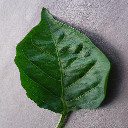

In [23]:
img = image.load_img("D:\\Project Buildathon\\Fertilizers_Recommendation_ System_For_Disease_ Prediction\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\train_set\\Pepper,_bell___healthy\\0a3f2927-4410-46a3-bfda-5f4769a5aaf8___JR_HL 8275.JPG",target_size=(128,128))
img

In [24]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x),axis=1)

index=['Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot']

index[pred[0]]

'Pepper,_bell___healthy'

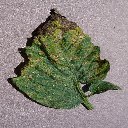

In [25]:
img = image.load_img("D:\\Project Buildathon\\Fertilizers_Recommendation_ System_For_Disease_ Prediction\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\train_set\\Tomato___Septoria_leaf_spot\\00f16858-f392-4d9e-ad9f-efab8049a13f___JR_Sept.L.S 8368.JPG",target_size=(128,128))
img

In [26]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x),axis=1)

index=['Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot']

index[pred[0]]

'Tomato___Septoria_leaf_spot'